In [9]:
from PIL import Image
from PIL import ImageDraw

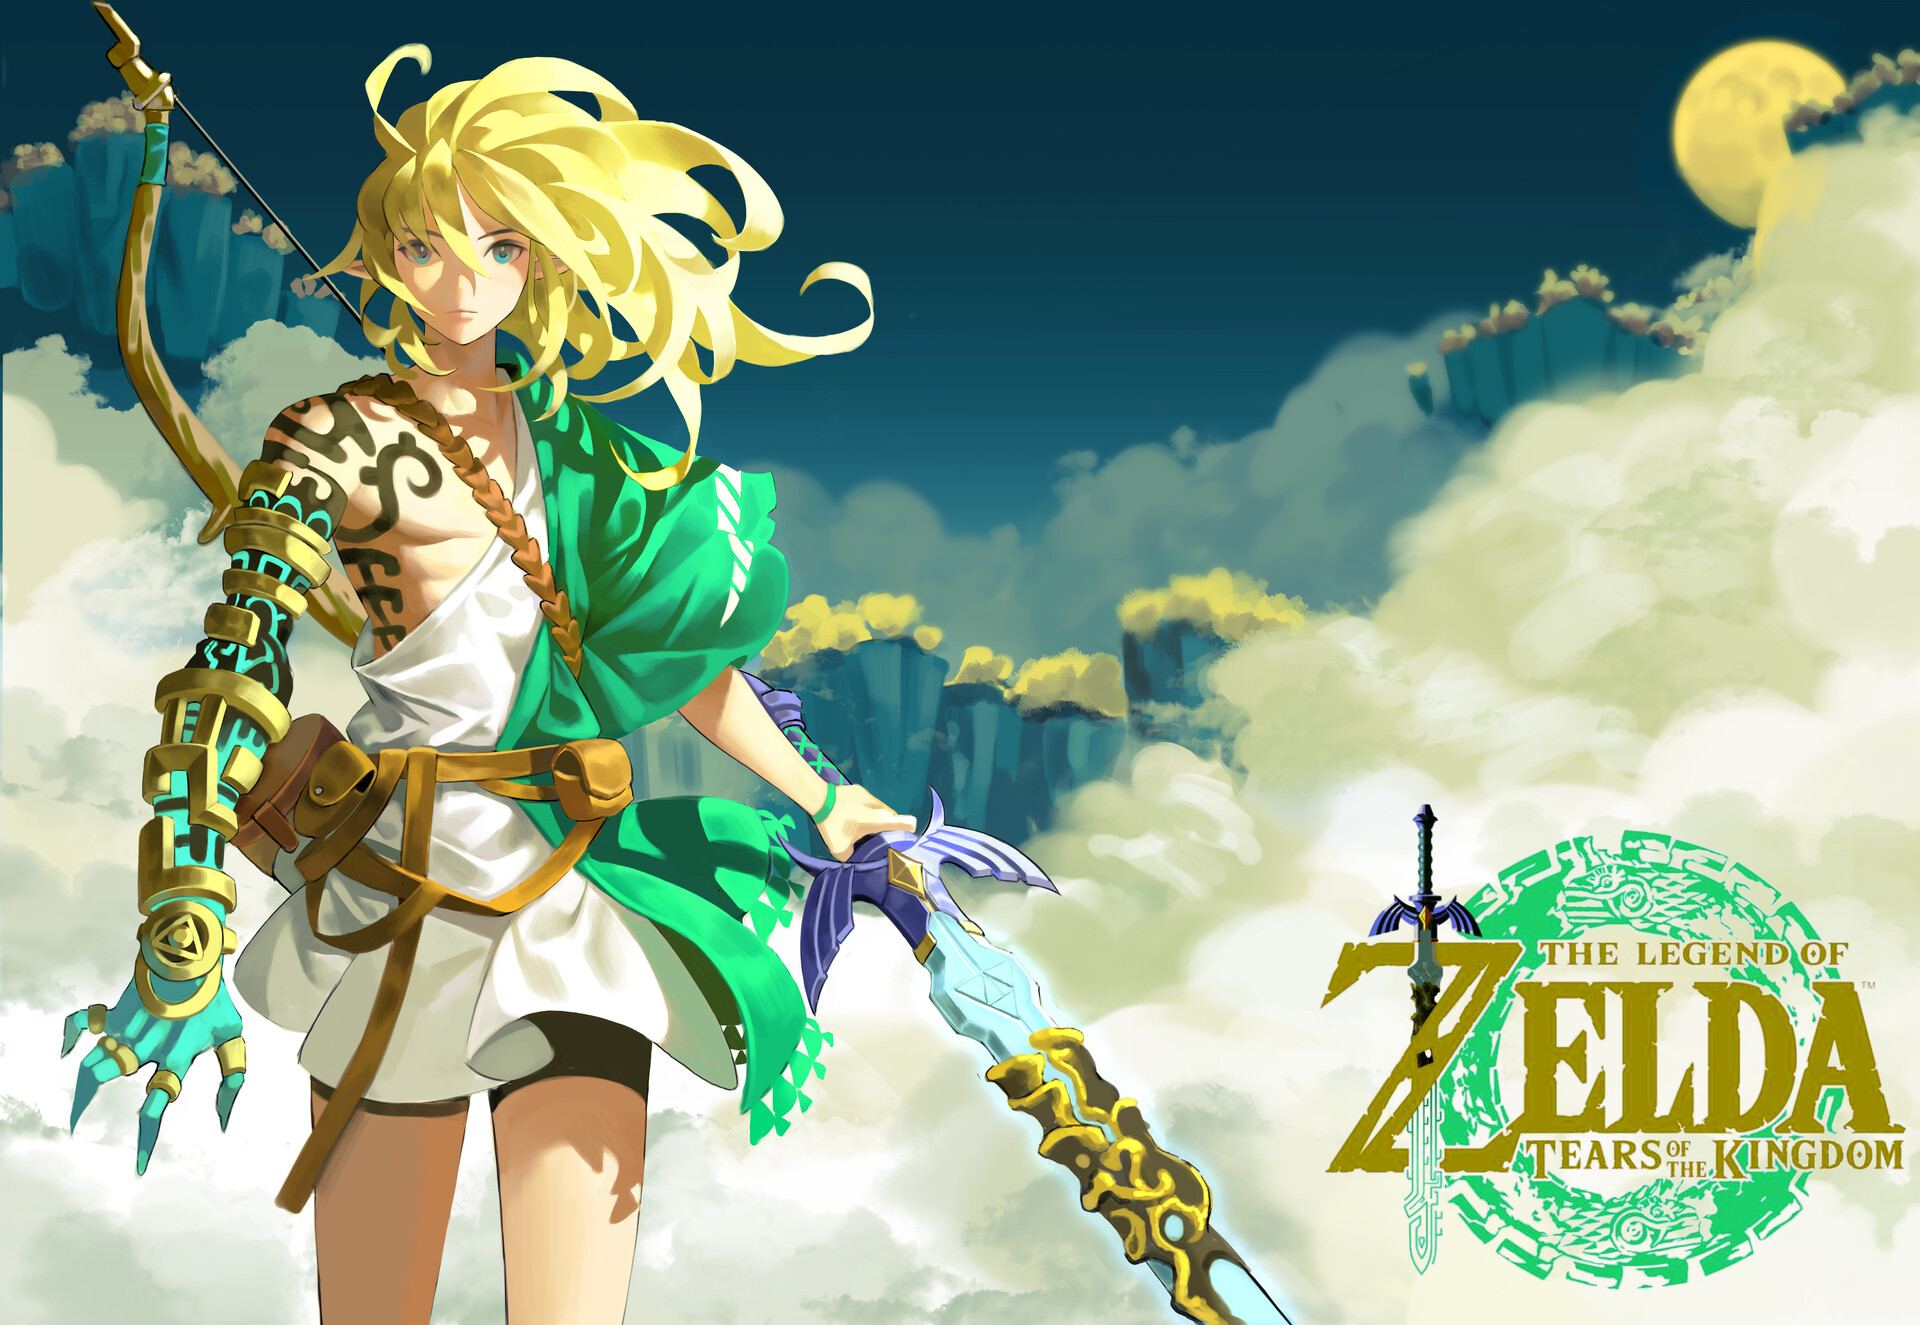

In [7]:
zelda = Image.open('./imgs/zelda.jpg')
zelda

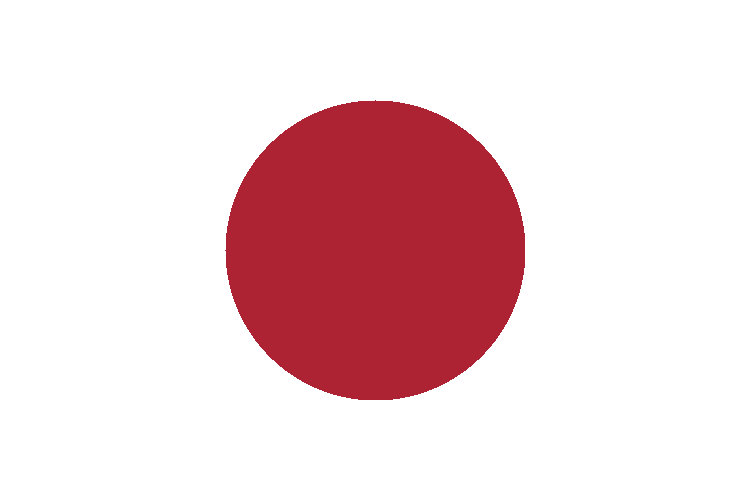

In [26]:
WHITE = (255, 255, 255)
RED = (173, 35, 51)

height = 500
width = 3*height//2

japan = Image.new('RGB', (width, height), WHITE)

radius = int ((3/5)*height)//2
center = (width//2, height//2)

for x in range(center[0]-radius, center[0]+radius):
    for y in range(center[1]-radius, center[1]+radius):
        if ((x-center[0])**2 + (y-center[1])**2) <= radius**2:
            japan.putpixel((x, y), RED)

japan

# Atividae 1<h1>
> Bandeira do brasil


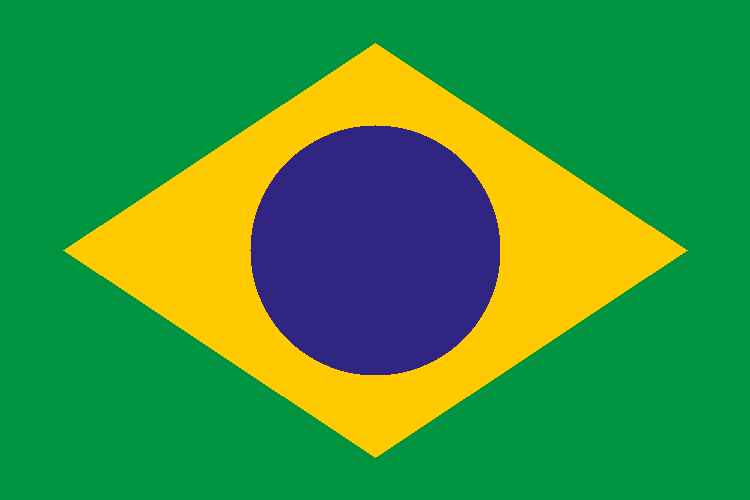

In [28]:
VERDE = (0, 148, 64)
AMARELO = (255, 203, 0)
AZUL = (48, 38, 129)

def create_brazilian_flag(height):
    width = 3 * height // 2

    brasil = Image.new("RGB", (width, height), VERDE)
 
    center = (width // 2, height // 2)

    # triangulo
    margin_x = 1.7 * (width // 20)  
    margin_y = 1.7 * (height // 20) 


    for x in range(0, width):
        for y in range(0, height):
            if abs(x - center[0]) / (width // 2 - margin_x) + abs(y - center[1]) / (height // 2 - margin_y) <= 1:
                brasil.putpixel((x, y), AMARELO)

    # circulo
    circle_diameter = (2 / 4) * height  
    circle_radius = int(circle_diameter // 2)  


    for x in range(center[0] - circle_radius, center[0] + circle_radius):
        for y in range(center[1] - circle_radius, center[1] + circle_radius):
            if ((x - center[0])**2 + (y - center[1])**2) <= circle_radius**2:
                brasil.putpixel((x, y), AZUL)


    return brasil



create_brazilian_flag(500)

# Interpolacao de pontos <h1>
> cod do professor da atividade a cima 

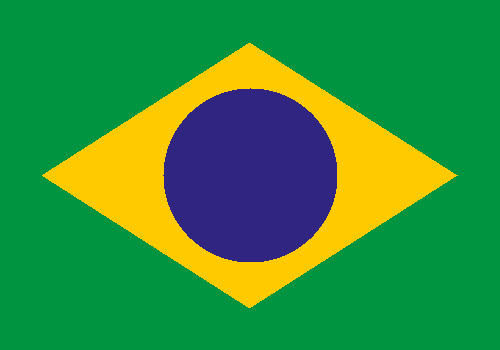

In [10]:
def crate_brazilian_flag(width):
    #cores
    GREEN = (0, 148, 64)
    YELLOW = (255, 203, 0)
    BLUE = (48, 38, 129)

    # PROPORCOES DA BANDEIRA

    height = int ((14/20)*width)
    unit = int(width/20)
    polygon_spacing = int(unit*1.7)
    radius = int(unit * 3.5)
    center = (width//2 , height//2)

    #Defini pontos do losangolo
    top_x, top_y = center[0], polygon_spacing
    rigth_x, rigth_y = (width - polygon_spacing), center[1]
    boottom_x, boottom_y = center[0], (height - polygon_spacing)
    left_x, laft_y = polygon_spacing, center[1]

    def interpolate_x(y, start_point, final_point):
        if start_point[1] == final_point[1]:
            return start_point[0]
        #funca matematica de interpolacao de pontos
        x = int (start_point[0] + ((y - start_point[1]) * (final_point[0] - start_point[0])) / (final_point[1] - start_point[1]))
        return x

    brazilian_flag = Image.new("RGB", (width,height),GREEN)

    for y in range(top_y, boottom_y):
        if y < center[1]:
            x_min = interpolate_x(y,(top_x, top_y), (left_x, laft_y))
            x_max = interpolate_x(y, (top_x, top_y),(rigth_x, rigth_y))
        else:
            x_min = interpolate_x(y,(left_x, laft_y), (boottom_x, boottom_y))
            x_max = interpolate_x(y,(rigth_x, rigth_y),(boottom_x,boottom_y))

        for x in range(x_min, x_max):
            brazilian_flag.putpixel((x,y), YELLOW)
        
    for x in range(center[0]-radius, center[0]+radius):
        for y in range(center[1]-radius, center[1]+radius):
            if ((x-center[0])**2 + (y-center[1])**2) <= radius**2:
                brazilian_flag.putpixel((x, y), BLUE)
    
    return brazilian_flag


crate_brazilian_flag(500)